# 第4回講義 演習

## 課題1. ロジスティック回帰の実装と学習

In [6]:
from sklearn.utils import shuffle
import numpy as np

np.random.seed(1234)

In [7]:
import matplotlib.pylab as plt
%matplotlib inline

### 1. シグモイド関数とその微分

In [8]:
def sigmoid(x):
    return 1/(1+np.exp(-x))# WRITE ME! 

def deriv_sigmoid(x):
    return (1-sigmoid(x))*sigmoid(x)
#     return np.power(1 + np.exp(-x), -2) * np.exp(-1)# WRITE ME!

In [10]:
A = np.arange(-10,10,0.1)
B = np.array([1,2,3,4,5])
C = np.array([0])

In [11]:
A = np.linspace(-6,6,100)
A.shape

(100,)

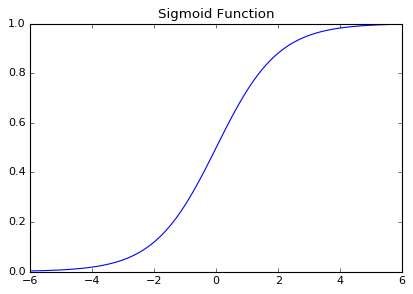

In [12]:
# plt.ylim(-0.1,1.1)
# plt.plot(A, np.array([1.1]))
plt.title("Sigmoid Function")
plt.plot(A,sigmoid(A))
# plt.plot(C,sigmoid(C), marker='o')
# plt.plot(A, upper, linestyle = '--')
# plt.plot(A, lower, linestyle = '--')

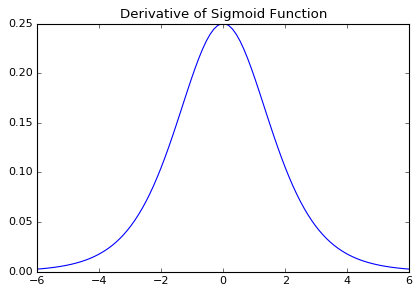

In [13]:
plt.title("Derivative of Sigmoid Function")
plt.plot(A, deriv_sigmoid(A))

### 2. データセットの設定と重みの定義

In [14]:
# OR
train_X = np.array([[0, 1], [1, 0], [0, 0], [1, 1]])
train_y = np.array([[1], [1], [0], [1]])
test_X, test_y = train_X, train_y

# weights
W = np.random.uniform(low=-0.08, high=0.08, size=(2, 1)).astype('float32')
b = np.zeros(1).astype('float32')

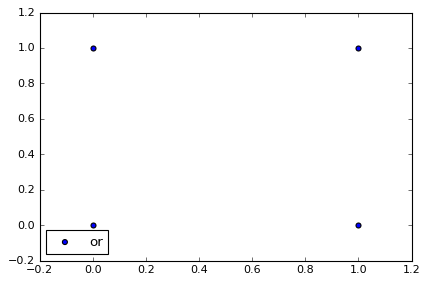

In [15]:
plt.scatter(train_X.T[0], train_X.T[1],label="or")
plt.legend(scatterpoints=1, loc='lower left')
plt.show()

In [16]:
train_X.shape

(4, 2)

In [17]:
np.dot(train_X,W) + b

array([[ 0.0195374 ],
       [-0.04935689],
       [ 0.        ],
       [-0.02981948]])

### 3. train関数とtest関数

##### 誤差関数
* 負の対数尤度関数 (Negative Loglikelihood Function）
* 交差エントロピー誤差関数ともいう

$$ E ( {\bf \theta} ) =  -\sum^N_{i=1} \left[ t_i \log y ({\bf x}_i ; {\bf \theta}) + (1 - t_i) \log \{ 1 - y ({\bf x}_i ; {\bf \theta}) \}\right] $$

In [18]:
def train(x, t, eps=1.0):
    global W, b # to access variables that defined outside of this function.
    
    # Forward Propagation
    y = # WRITE ME!
    
    # Back Propagation (Cost Function: Negative Loglikelihood)
    cost = np.sum(-t*np.log(y)-(1-t)*np.log(1-y))
    delta = # WRITE ME!
    
    # Update Parameters
    dW = # WRITE ME!
    db = # WRITE ME!
    W = W - eps*dW
    b = b - eps*db

    return cost

def test(x, t):
    # Test Cost
    y = # WRITE ME!
    cost = np.sum(-t*np.log(y)-(1-t)*np.log(1-y))
    return cost, y

SyntaxError: invalid syntax (<ipython-input-18-485d160593fe>, line 5)

### 4. 学習

In [ ]:
# Epoch
for epoch in range(1000):
    # Online Learning
    for x, y in zip(train_X, train_y):
        cost = train(x[np.newaxis, :], y[np.newaxis, :])
    cost, pred_y = test(test_X, test_y)

print(pred_y)

## 課題2. 活性化関数とその微分の実装

###  1. シグモイド関数とその微分

In [ ]:
def sigmoid(x):
    return # WRITE ME!

def deriv_sigmoid(x):
    return # WRITE ME!

In [221]:
def sigmoid(x):
    return 1/(1+np.exp(-x))# WRITE ME! 

def deriv_sigmoid(x):
    return (1-sigmoid(x))*sigmoid(x)
#     return np.power(1 + np.exp(-x), -2) * np.exp(-1)# WRITE ME!

# def deriv_sigmoid_2(x):
#     return (1-sigmoid(x))*sigmoid(x)

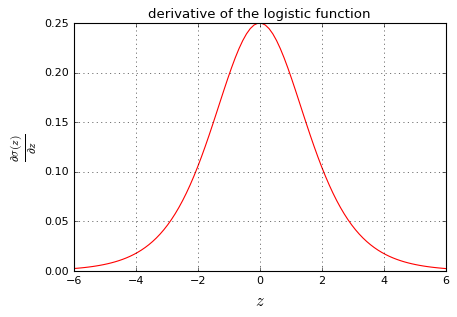

In [161]:
# Plot the derivative of the logistic function
z = np.linspace(-6,6,100)
plt.plot(z, deriv_sigmoid(z), 'r-')
plt.xlabel('$z$', fontsize=15)
plt.ylabel('$\\frac{\\partial \\sigma(z)}{\\partial z}$', fontsize=15)
plt.title('derivative of the logistic function')
plt.grid()
plt.show()

### 2. ソフトマックス関数とその微分

In [225]:
def softmax(x):
    exp_x = np.exp(x)
    sum_exp_x = np.sum(exp_x)
    return exp_x / sum_exp_x # WRITE ME!


def deriv_softmax(x)
    return (1-softmax(x))*softmax(x)# WRITE ME!

In [ ]:
def deriv_softmax(x):
    
    return (1-softmax(x))*softmax(x)# WRITE ME!

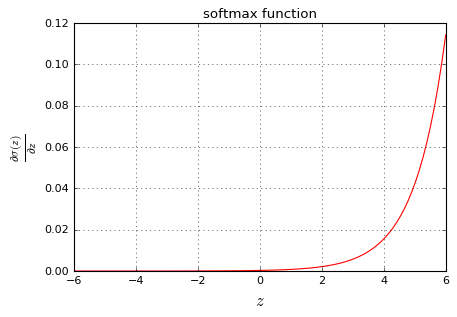

In [289]:
# Plot the derivative of the logistic function
z = np.linspace(-6,6,100)
plt.plot(z, softmax(z), 'r-')
plt.xlabel('$z$', fontsize=15)
plt.ylabel('$\\frac{\\partial \\sigma(z)}{\\partial z}$', fontsize=15)
plt.title('softmax function')
plt.grid()
plt.show()

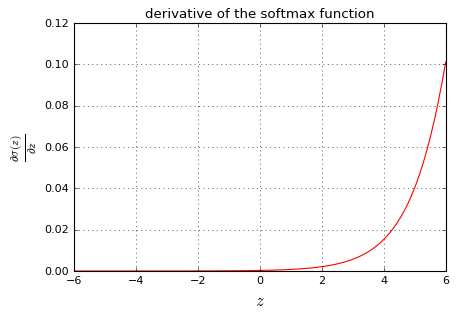

In [290]:
# Plot the derivative of the logistic function
z = np.linspace(-6,6,100)
plt.plot(z, deriv_softmax(z), 'r-')
plt.xlabel('$z$', fontsize=15)
plt.ylabel('$\\frac{\\partial \\sigma(z)}{\\partial z}$', fontsize=15)
plt.title('derivative of the softmax function')
plt.grid()
plt.show()

### 3. tanh関数とその微分

In [212]:
def tanh(x):  
    return np.tanh(x)
#     return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))# WRITE ME!

def deriv_tanh(x):
    return 1 - tanh(x)**2 # WRITE ME!
#     return 1 - np.power((np.exp(x) - np.exp(-x) / (np.exp(x) + np.exp(-x))),2)

In [1]:
plt.plot(z, tanh(z))

NameError: name 'plt' is not defined

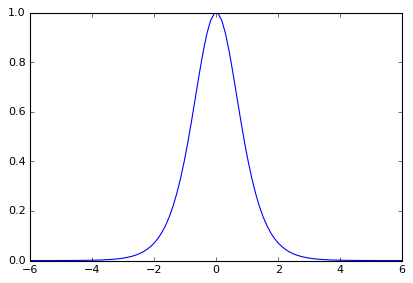

In [214]:
plt.plot(z, deriv_tanh(z))

## 課題3. 多層パーセプトロンの実装と学習

### 1. データセットの設定と重みの定義

In [229]:
# XOR
train_X = np.array([[0, 1], [1, 0], [0, 0], [1, 1]])
train_y = np.array([[1], [1], [0], [0]])
test_X, test_y = train_X, train_y

# Layer1 weights
W1 = np.random.uniform(low=-0.08, high=0.08, size=(2, 3)).astype('float32')
b1 = np.zeros(3).astype('float32')

# Layer2 weights
W2 = np.random.uniform(low=-0.08, high=0.08, size=(3, 1)).astype('float32')
b2 = np.zeros(1).astype('float32')

In [230]:
W1

array([[ 0.07635863,  0.00910315, -0.06643619],
       [-0.02671961,  0.03654859, -0.05721034]], dtype=float32)

In [231]:
b1

array([ 0.,  0.,  0.], dtype=float32)

In [235]:
W2

array([[ 0.00839503],
       [-0.03631308],
       [ 0.07591923]], dtype=float32)

In [236]:
b2

array([ 0.], dtype=float32)

### 2.train関数とtest関数

##### 誤差関数
* 負の対数尤度関数 (Negative Loglikelihood Function）
* 交差エントロピー誤差関数ともいう

$$ E ( {\bf \theta} ) =  -\sum^N_{i=1} \left[ t_i \log y ({\bf x}_i ; {\bf \theta}) + (1 - t_i) \log \{ 1 - y ({\bf x}_i ; {\bf \theta}) \}\right] $$

In [233]:
#mean_squared_error()
def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)  

In [237]:
#cross_entropy_error() #Negative Likelihood Funcion
def cross_entropy_error():
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [ ]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    for i in range(step_sum):
        grad

In [241]:
train_X.shape

(4, 2)

In [ ]:
#x.shape (1,2)     

In [251]:
def loss_entro(y, t):
    delta = 1e-7
    y += delta
    return np.sum(-t*np.log(y) - (1 - t)*np.log(1 - y))

In [ ]:
def softmax_2class(x):
    np.np.exp(1-x) + np.exp(x)
    return round(x)

In [286]:
def softmax_2class(x):
    return round(x)

In [288]:
softmax_2(0.5001)

1

In [242]:
def train(x, t, eps=1.0): #eps(epsilon)  learning - rate
    global W1, b1, W2, b2 # to access variables that defined outside of this function.
    
    # Forward Propagation Layer1
    u1 = np.dot(x,W1) + b1 # WRITE ME!
    z1 = sigmoid(u1) # WRITE ME!
    
    # Forward Propagation Layer2
    u2 = np.dot(z1,W2) + b2 # WRITE ME!
    z2 = softmax(u2) # WRITE ME!
    
    # Back Propagation (Cost Function: Negative Loglikelihood)
    y = z2
    cost = np.sum(-t*np.log(y) - (1 - t)*np.log(1 - y))   #[0,1] two-class 
    delta_2 = # WRITE ME! # Layer2 delta
    delta_1
    # WRITE ME! # Layer1 delta

    # Update Parameters Layer1
    dW1 = # WRITE ME!
    db1 = # WRITE ME!
    W1 = W1 - eps*dW1
    b1 = b1 - eps*db1
    
    # Update Parameters Layer2
    dW2 = # WRITE ME!
    db2 = # WRITE ME!
    W2 = W2 - eps*dW2
    b2 = b2 - eps*db2

    return cost

def test(x, t):
    # Forward Propagation Layer1
    u1 = # WRITE ME!
    z1 = # WRITE ME!
    
    # Forward Propagation Layer2
    u2 = # WRITE ME!
    z2 = # WRITE ME!
    
    y = z2
    
    # Test Cost
    cost = np.sum(-t*np.log(y)-(1-t)*np.log(1-y))
    return cost, y

SyntaxError: invalid syntax (<ipython-input-242-df8c1cd542b5>, line 15)

### 3. 学習

In [294]:
for x, y in zip(train_X, train_y):
    print (x, y)

[0 1] [1]
[1 0] [1]
[0 0] [0]
[1 1] [0]


In [ ]:
# Epoch
for epoch in range(2000):
    # Online Learning
    for x, y in zip(train_X, train_y):
        cost = train(x[np.newaxis, :], y[np.newaxis, :])
    cost, pred_y = test(test_X, test_y)

print(pred_y)